<a href="https://colab.research.google.com/github/deepandas11/Deep-Learning-with-TensorFlow-Keras-PyTorch/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semi-supervised Learning - Autoencoder

ANN used to learn efficient encodings. Learn a representation for a set of data, typically for the purpose of dimensionality reduction.

Autoencoding is a data compression algorithm where the compression and decompression functions are:
- data-specific
- lossy
- learned automatically from examples,
rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

### 1. FCN Autoencoder

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist

import numpy as np

In [0]:
encoding_dim = 32

# Computation graph
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation = 'relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Model 1 : reconstruction (Original -> Encoded -> Decoded)
autoencoder = Model(input_img, decoded)

#Model 2 : Encoded  (Original -> Encoded)
encoder = Model(input_img, encoded) 

In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]


# Model 3 : Decoder (Encoded -> Reconstruction)
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

# Data Preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [23]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.3536 - val_loss: 0.2700
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2619 - val_loss: 0.2511
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2421 - val_loss: 0.2306
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2226 - val_loss: 0.2126
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2075 - val_loss: 0.2000
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1966 - val_loss: 0.1906
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1881 - val_loss: 0.1831
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1812 - val_loss: 0.1766
Epoch 9/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1750 - val_loss: 0.1709
Epoch

##### Output

We run an encoder model on the input and then run the decoder on that encoded output. We compare that with the original input.

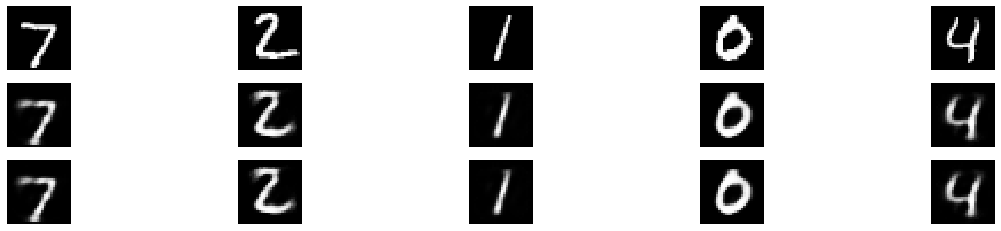

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

autoencoded_imgs = autoencoder.predict(x_test)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #autoencoder
    ax = plt.subplot(3, n, i + 1 + n+n)
    plt.imshow(autoencoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

##### Sample Generation with Autoencoder

Instead of passing the encoded input images, pass random values and decode with this trained decoder

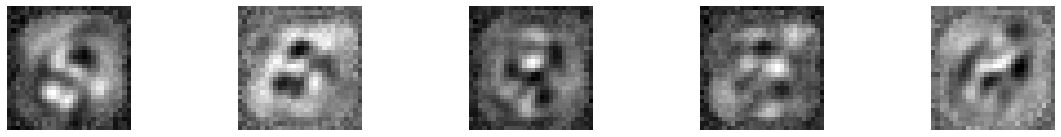

In [25]:
sample_encodings = np.random.rand(10,encoding_dim)
decoded_imgs1 = decoder.predict(sample_encodings)

n =5
plt.figure(figsize = (20,5))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(decoded_imgs1[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders.

In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [27]:
from keras import backend as K

if K.image_data_format() == 'channels_last':
    shape_ord = (28, 28, 1)
else:
    shape_ord = (1, 28, 28)
    
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, ((x_train.shape[0],) + shape_ord))  
x_test = np.reshape(x_test, ((x_test.shape[0],) + shape_ord))

x_train.shape

(60000, 28, 28, 1)

In [28]:
from keras.callbacks import TensorBoard
batch_size=128
steps_per_epoch = np.int(np.floor(x_train.shape[0] / batch_size))
conv_autoencoder.fit(x_train, x_train, epochs=10, batch_size=128,
                     shuffle=True, validation_data=(x_test, x_test),
                     callbacks=[TensorBoard(log_dir='./tf_autoencoder_logs')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.2102 - val_loss: 0.1565
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1486 - val_loss: 0.1374
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1361 - val_loss: 0.1335
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1293 - val_loss: 0.1274
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1250 - val_loss: 0.1204
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.1219 - val_loss: 0.1182
Epoch 7/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1196 - val_loss: 0.1173
Epoch 8/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1174 - val_loss: 0.1150
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1160 - val_loss: 0.1

#### Comparing the output of Convolutional Autoencoder and the Dense FC Autoencoder

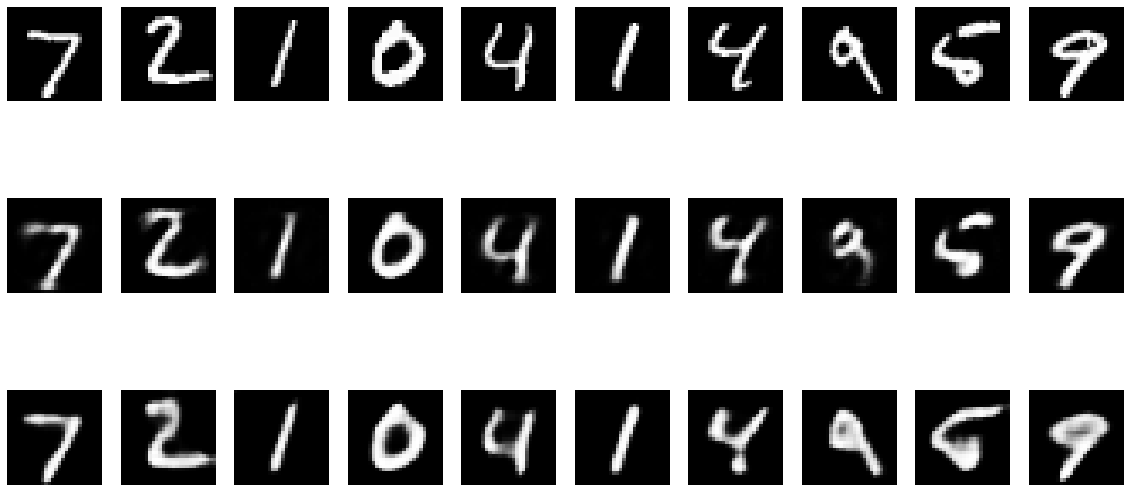

In [31]:
decoded_imgs_conv = conv_autoencoder.predict(x_test)
n=10

plt.figure(figsize = (20,10))

for i in range(n):
    ax = plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3,n,i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3,n,i+n+n+1)
    plt.imshow(decoded_imgs_conv[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()